In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams.update(
    {"font.size": 11, "figure.facecolor": "w", "axes.facecolor": "w", "axes.spines.right": False,"axes.spines.top": False, "axes.spines.bottom": False,
        "xtick.top": False,
        "xtick.bottom": False,
        "ytick.right": False,
        "ytick.left": False,
    }
)

plt.rcParams['figure.figsize'] = (12, 4)


import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading dataset
df = pd.read_csv("D:\Power_bi_projects\ecommerce\data.csv ",encoding='latin1')

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [5]:
#Take an overall look
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:

df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
#Check Dimensions
df.shape

(541909, 8)

In [8]:
#Check Duplicates
df.duplicated().sum()

5268

In [9]:
#Drop Duplicates
df = df.drop_duplicates()

#Check again
df.duplicated().sum()

0

In [10]:
#Checking Null Values
for col in df.columns:
    pct_missing = df[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

InvoiceNo - 0.0%
StockCode - 0.0%
Description - 0.3%
Quantity - 0.0%
InvoiceDate - 0.0%
UnitPrice - 0.0%
CustomerID - 25.2%
Country - 0.0%


In [11]:
#Make a copy
copy = df.copy()

#Dealing with missing values in our main data
df['Description'] = df['Description'].fillna('Unknown')
df['CustomerID']  = df['CustomerID'].fillna(0)

In [12]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
#Looking at Data Types
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [14]:
#Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Convert CustomerID to integer
df['CustomerID'] = df['CustomerID'].astype('int64')

<AxesSubplot:ylabel='UnitPrice'>

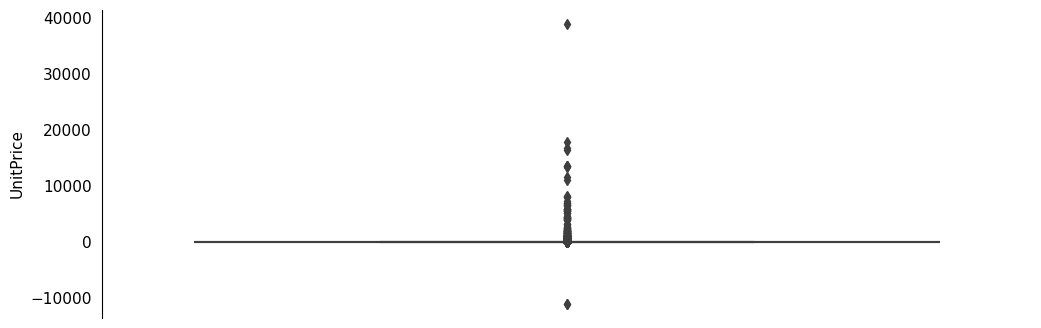

In [15]:
#Check Unit Price's Distribution
sns.boxplot( y= 'UnitPrice' ,data =df)

In [16]:
df[df['UnitPrice'] <0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,0,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,0,United Kingdom


In [17]:
#Filter our data
df  = df[df['UnitPrice'] > 0]

In [18]:
#Check the minimum
df['UnitPrice'].min()

0.001

In [19]:
#Making a new column
df['Checkout_Price'] = df['Quantity'] * df ['UnitPrice']

In [20]:
#Making a new columns for time series analysis
df['Year'] = df['InvoiceDate'].dt.year
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['YearMonth'] = df['YearMonth'].astype(str)

In [21]:
canceled = df[df['InvoiceNo'].str.contains('C')]
df = df[~df['InvoiceNo'].str.contains('C' ,na = False)]

In [22]:
#Customer Type Column
df.loc[df['CustomerID'] == 0 , 'CustomerType'] = 'Normal'
df.loc[df['CustomerID'] > 0 , 'CustomerType'] = 'Member'

In [23]:
#Groupping Product by Checkout price
product_sales= df.groupby('Description').agg({'Checkout_Price' : 'sum'}).sort_values(by = 'Checkout_Price' , ascending = False).reset_index(drop= False).head(5)


In [24]:
#Choosing Palette and reverse it
Palette = sns.color_palette('BuPu')
Palette.reverse()

Text(0, 0.5, 'Product Description')

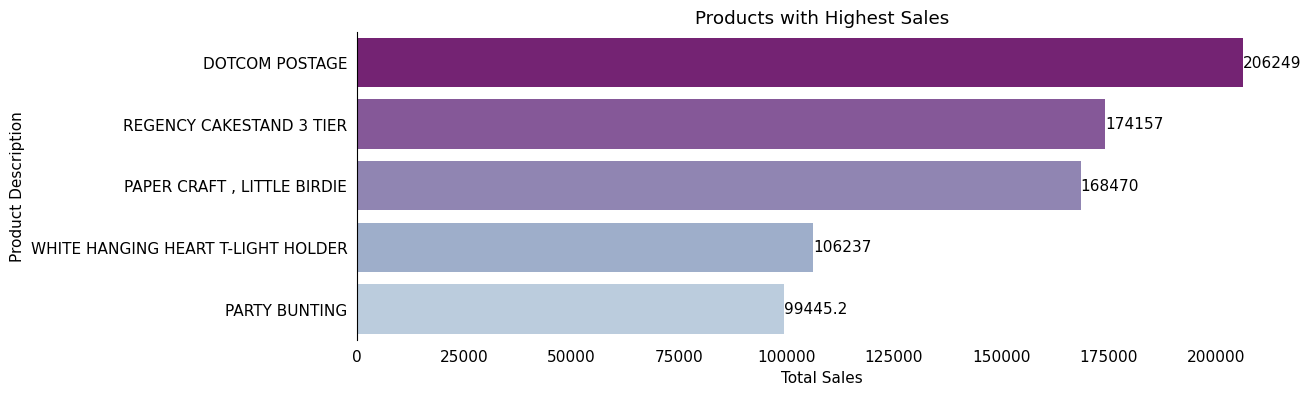

In [25]:

#Visualizing 
ad =sns.barplot(y = 'Description' , x= 'Checkout_Price' , data = product_sales , palette = Palette)

#Data labels
ad.bar_label(ad.containers[0])

#Setting Title
plt.title('Products with Highest Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Description')

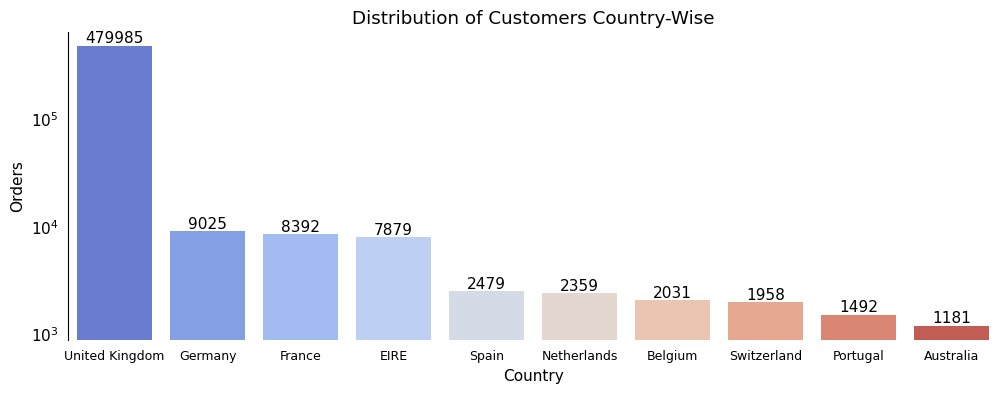

In [26]:
#Counting Country
country = df['Country'].value_counts().reset_index(drop = False).head(10)
country.columns = ["Country","Counts"]

#Visualizing Data
ab = sns.barplot(x = 'Country' , y = 'Counts' ,data = country , palette ='coolwarm')

#Data labels
ab.bar_label(ab.containers[0])

#Setting title
plt.title('Distribution of Customers Country-Wise')
plt.ylabel('Orders')
plt.xticks(fontsize = 9)
plt.yscale('log')

Text(0, 0.5, 'Total Sales')

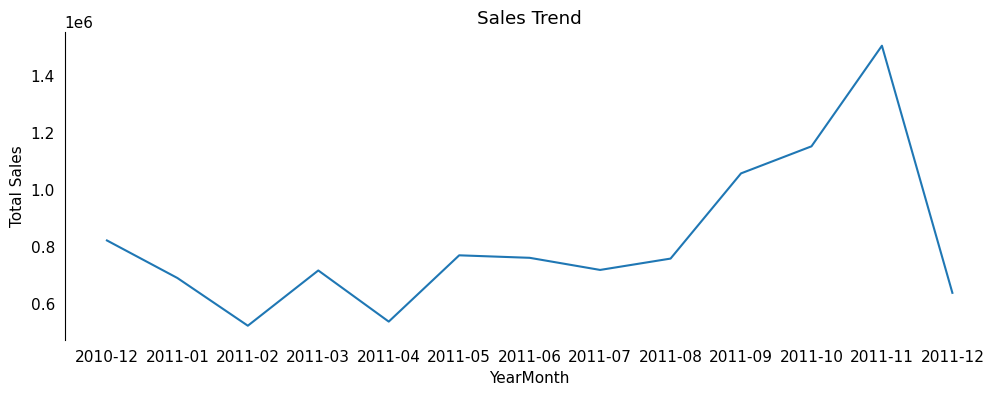

In [27]:
#Grouping month and month number by Checkout price
month_sales = df.groupby('YearMonth')['Checkout_Price'].sum().reset_index(drop = False)

#Visualizing time-series sales
sns.lineplot(x = 'YearMonth', y = 'Checkout_Price',data = month_sales)
plt.title('Sales Trend')
plt.ylabel('Total Sales')

Text(0.5, 1.0, 'Distribution of Customer type Count ')

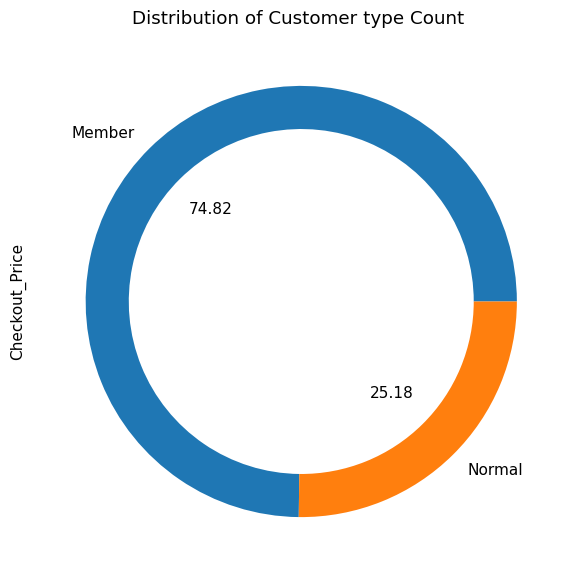

In [28]:
#Making a donut chart for Customer type distribution 
df.groupby('CustomerType').count()['Checkout_Price'].plot(kind='pie', autopct= '%.2f', figsize=(10,7),subplots=True, wedgeprops=dict(width=0.20))
plt.title('Distribution of Customer type Count ')

Text(0, 0.5, 'Average Sales')

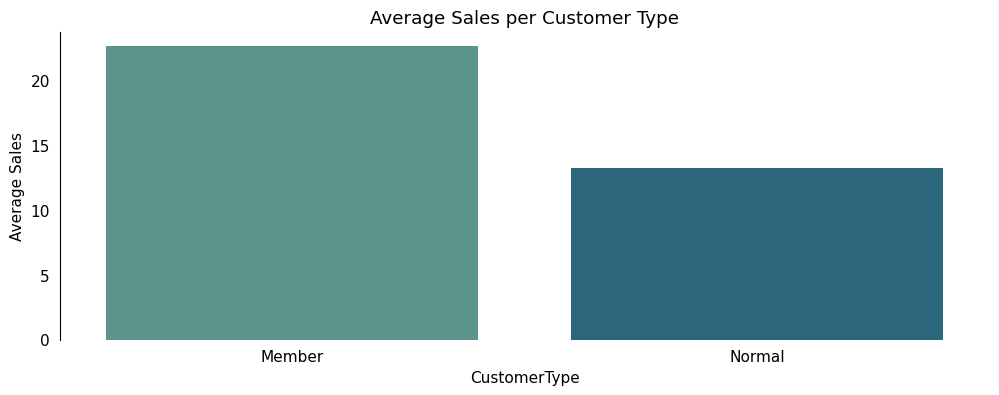

In [29]:
#Groupping customer type by average sales
customer_sales = df.groupby('CustomerType')['Checkout_Price'].mean().reset_index(drop = False)

#Visualizing Data
sns.barplot(x= 'CustomerType' , y = 'Checkout_Price' , data = customer_sales , palette = 'crest' )

#Setting Title
plt.title('Average Sales per Customer Type')
plt.ylabel('Average Sales')

In [30]:
#RFM ANALYSIS

In [31]:
#Ignoring Cancel orders
copy[~copy['InvoiceNo'].str.contains('C' ,na = False)]

#Dropping Null values in Customer ID column
copy= copy.dropna(subset= ['CustomerID'])

#Make Checkoutprice Column
copy['CheckoutPrice'] = copy['UnitPrice'] * copy['Quantity']

#Ignoring Debts
copy =copy[copy['UnitPrice']>0]

#Dealing with datatypes
copy['InvoiceDate'] = pd.to_datetime(copy['InvoiceDate'])
copy['CustomerID'] = copy['CustomerID'].astype('int64')

In [32]:
#Define today
today_date = copy['InvoiceDate'].max()

In [33]:
#Set our data to rfm Analysis
rfm = copy.groupby('CustomerID').agg({'InvoiceDate' : lambda date : (today_date - date.max()).days ,'InvoiceNo' : lambda num :num.nunique() ,'CheckoutPrice' : lambda CheckoutPrice :CheckoutPrice.sum()} )
rfm

,InvoiceDate,InvoiceNo,CheckoutPrice
CustomerID,,,
12346,325,2,0.00
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40
...,...,...,...
18280,277,1,180.60
18281,180,1,80.82
18282,7,3,176.60


In [34]:
#Naming Columns
rfm.columns = ['Recency' ,'Frequency' , 'Monetary']

In [35]:
#Ignore 0 in Monatery so we will not need those customers in our analysis 
rfm = rfm[rfm['Monetary']>0]

In [36]:
#Set Recency Score
rfm['Recency_Score'] = pd.qcut(rfm['Recency'] ,5 , labels= [5,4,3,2,1])

In [37]:
#Set Frequency Score
rfm['Frequency_Score'] = pd.qcut(rfm['Frequency'].rank(method ='first') ,5 , labels= [1,2,3,4,5])

In [38]:
#Set Monetary Score
rfm['Monetary_Score'] = pd.qcut(rfm['Monetary'] ,5 , labels= [1,2,3,4,5])

In [39]:
#Set RFM Score
rfm['RFM_Score'] = (rfm['Recency_Score'].astype(str) + rfm['Frequency_Score'].astype(str) + rfm['Monetary_Score'].astype(str) )

In [40]:

#Our Customer Segmentation
seg_map = {
    r'[1-2][1-2][1-5]': 'Hibernating',
    r'[1-2][3-4][1-5]': 'At risk',
    r'[1-2]5[1-5]' :'Cannot lose them',
    r'3[1-2][1-5]' : 'About to sleep',
    r'33[1-5]' : 'Need Attention',
    r'[3-4][4-5][1-5]' : 'Loyal Customers',
    r'[4-5][1-3][1-5]' : 'Good Potential',
    r'5[4-5][1-5]' : 'Champions',

}
rfm['Segment'] = rfm['RFM_Score'] .replace(seg_map ,regex =True)

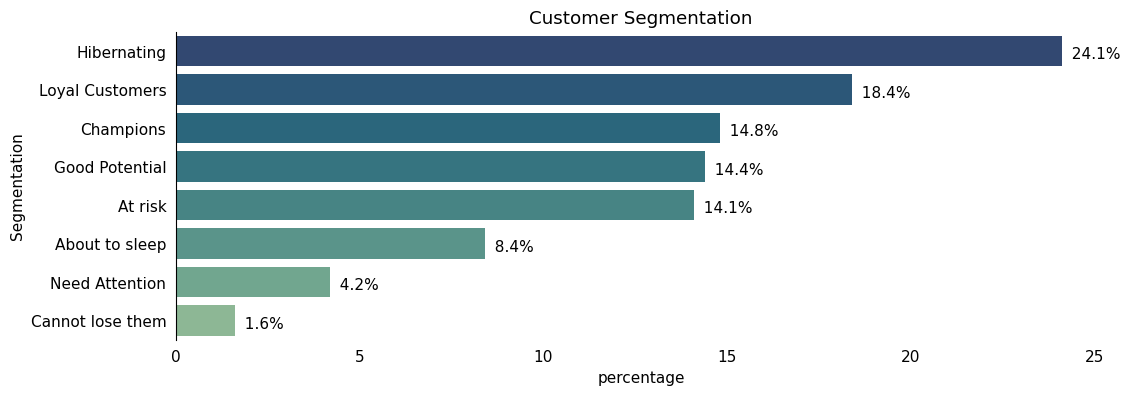

In [41]:
#Bar Plot for Our segments
Segments = (rfm['Segment'].value_counts(normalize=True)* 100).reset_index(name='percentage')
Segments = Segments.round(1)
b =sns.barplot(y='index',x='percentage', data=Segments, palette = 'crest_r')
for i, v in enumerate(Segments['percentage']):
    b.text(v,i+0.20,"  {:.1f}".format(v)+"%", color='black', ha="left")
    b.set_ylabel('Segmentation')
    b.set_title('Customer Segmentation')

In [42]:
# saving the cleaned data for power bi visualization
df.to_csv("C:\\Users\\Satyam Singh\\data.csv")


In [43]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Checkout_Price,Year,YearMonth,CustomerType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,2010-12,Member
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010-12,Member
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,2010-12,Member
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010-12,Member
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,2010-12,Member
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011,2011-12,Member
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,2011-12,Member
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,2011-12,Member
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,2011-12,Member


In [44]:
display(rfm[['Recency', 'Frequency', 'Monetary', 'Recency_Score','Frequency_Score','Monetary_Score']])

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
CustomerID,,,,,,
12347,1,7,4310.00,5,4,5
12348,74,4,1797.24,2,3,4
12349,18,1,1757.55,4,1,4
12350,309,1,334.40,1,1,2
12352,35,11,1545.41,3,5,4
...,...,...,...,...,...,...
18280,277,1,180.60,1,2,1
18281,180,1,80.82,1,2,1
18282,7,3,176.60,5,3,1
